# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [4]:
df = pd.read_excel('/content/data.xlsx')

In [5]:
df.head()

,Name,Post's Frequently?,Active?,Replies To Comments?,# of Friends,Personality
0,Allen,0,1,1,491,1
1,Mark,1,1,1,1400,1
2,Mago,1,1,1,35,0
3,Adrian,0,1,0,424,0
4,Genesis,0,1,0,1500,0


In [6]:
df.drop(columns='Name', inplace=True)

In [7]:
df.head()

,Post's Frequently?,Active?,Replies To Comments?,# of Friends,Personality
0,0,1,1,491,1
1,1,1,1,1400,1
2,1,1,1,35,0
3,0,1,0,424,0
4,0,1,0,1500,0


Display the summary of all the features of the dataset using `.info()`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Post's Frequently?    100 non-null    int64
 1   Active?               100 non-null    int64
 2   Replies To Comments?  100 non-null    int64
 3   # of Friends          100 non-null    int64
 4   Personality           100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [9]:
df.describe()

,Post's Frequently?,Active?,Replies To Comments?,# of Friends,Personality
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.710000,0.980000,0.730000,1563.210000,0.750000
std,0.456048,0.140705,0.446196,1334.175486,0.435194
min,0.000000,0.000000,0.000000,35.000000,0.000000
25%,0.000000,1.000000,0.000000,552.750000,0.750000
50%,1.000000,1.000000,1.000000,1100.000000,1.000000
75%,1.000000,1.000000,1.000000,2400.000000,1.000000
max,1.000000,1.000000,1.000000,5900.000000,1.000000


Display the total number of samples from each label using `.value_counts()`

In [10]:
df['Personality'].value_counts()

,count
Personality,
1,75
0,25


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

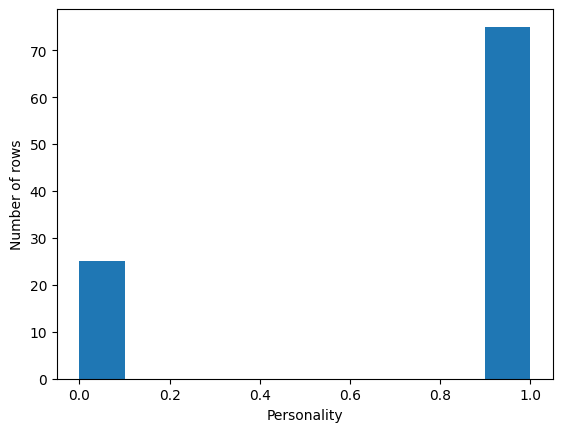

In [11]:
plt.hist(df["Personality"])
plt.xlabel("Personality")
plt.ylabel("Number of rows")
plt.show()

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [13]:
# Array of features
X = df.drop(columns=['Personality']).values



Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [16]:
## Array of Labels
y = df['Personality'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)


Display the dimensions of each variables using `.shape()`

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 4)
(80,)
(20, 4)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [20]:
knn = KNeighborsClassifier(n_neighbors=13)

Train the model using the `.fit()`

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Test the model using the `.predict()`

In [22]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

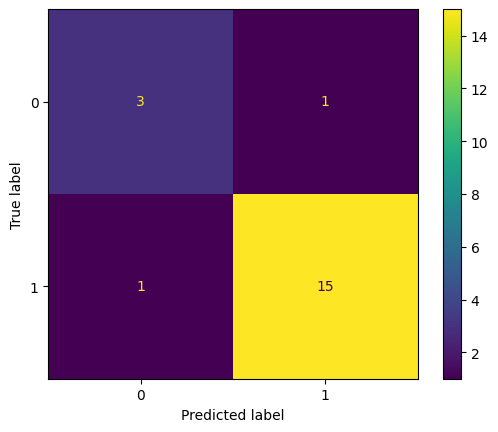

In [23]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [27]:
accuracy_score(y_test, y_pred)

0.9

Display the precision

In [28]:
precision_score(y_test, y_pred)

0.9375

Display the recall

In [29]:
recall_score(y_test, y_pred)

0.9375

Display the f1-score

In [30]:
f1_score(y_test, y_pred)

0.9375

## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [31]:
knn.predict([[1, 1, 1, 500]])

array([0])